kt_wiz에서 활약을 하고있는 황재균 선수의 21년도 타점 예측하기</br>
data set은 황재균의 07년도부터 21년도까지의 데이터</br>
train data는 1585 행까지(07년~20년도), test data는 끝까지(21년도, 44경기)</br>
독립변수 X는 상대, 타율, 타석, 안타, 2루타, 3루타, 홈런으로 7개의 feature</br>
타겟 y는 타점

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
# 랜덤 시드 고정시키기
np.random.seed(5)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.optimizers import Adam


In [ ]:
# 한글 깨짐방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
df = pd.read_csv('/content/Hwang_07_21_data.txt', sep='\t')
df.tail()

,4월,상대,타율,타격,타석,득점,안타,2루타,3루타,홈런,타점,도루,도루실패,볼넷,사구,삼진,병살타,AVG2
1623,6.27,한화,0.500,4,4,2,2,0,0,1,4,0,0,0,0,2,0,0.309
1624,6.30,LG,0.500,4,4,1,2,0,0,0,1,0,1,0,0,0,0,0.314
1625,7.01,LG,0.000,5,5,1,0,0,0,0,0,0,0,0,0,2,0,0.304
1626,7.02,키움,0.500,4,4,2,2,0,0,0,0,0,0,0,0,0,0,0.309
1627,7.04,키움,0.400,5,5,2,2,0,0,0,3,0,0,0,0,0,0,0.312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4월      1628 non-null   float64
 1   상대      1628 non-null   object 
 2   타율      1628 non-null   object 
 3   타격      1628 non-null   int64  
 4   타석      1628 non-null   int64  
 5   득점      1628 non-null   int64  
 6   안타      1628 non-null   int64  
 7   2루타     1628 non-null   int64  
 8   3루타     1628 non-null   int64  
 9   홈런      1628 non-null   int64  
 10  타점      1628 non-null   int64  
 11  도루      1628 non-null   int64  
 12  도루실패    1628 non-null   int64  
 13  볼넷      1628 non-null   int64  
 14  사구      1628 non-null   int64  
 15  삼진      1628 non-null   int64  
 16  병살타     1628 non-null   int64  
 17  AVG2    1628 non-null   float64
dtypes: float64(2), int64(14), object(2)
memory usage: 229.1+ KB


In [ ]:
df = df.replace('-', np.nan)
# 타석에도 못섰을 때 '-' 표시가 있음
# 어차피 없는 경기라 치고 dropna로 삭제하기

df.head()

,4월,상대,타율,타격,타석,득점,안타,2루타,3루타,홈런,타점,도루,도루실패,볼넷,사구,삼진,병살타,AVG2
0,4.19,두산,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,4.21,롯데,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000
2,4.22,롯데,0.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000
3,4.26,두산,1.000,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0.333
4,5.01,LG,0.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.250


In [ ]:
df = df.dropna()

# 약 40여개의 데이터가 삭제 된 것을 확인할 수 있음

In [ ]:
df = df.drop(['4월', '타격', '득점', '도루', '도루실패', '볼넷', '사구', '삼진', '병살타', 'AVG2'], axis=1)

In [ ]:
df

,상대,타율,타석,안타,2루타,3루타,홈런,타점
1,롯데,0.000,1,0,0,0,0,0
2,롯데,0.000,1,0,0,0,0,0
3,두산,1.000,1,1,0,0,0,0
4,LG,0.000,1,0,0,0,0,0
7,SK,0.500,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1623,한화,0.500,4,2,0,0,1,4
1624,LG,0.500,4,2,0,0,0,1
1625,LG,0.000,5,0,0,0,0,0
1626,키움,0.500,4,2,0,0,0,0


5타점부터 이상치라고 생각하고 제거하기 

In [ ]:
df = df[df['타점'] <= 4]


# 0타점 : 1040
# 1타점 : 343
# 2타점 : 132
# 3타점 : 45
# 4타점 : 24
# 5타점 : 5
# 6타점 : 1
# 7타점 : 1


'상대' 컬럼 onehot encoding하기

In [ ]:
# 결측값을 제외하고 0과 1로 구성된 더미 값을 만든다.
onehot = pd.get_dummies(df['상대'])
onehot

,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0,0,0,0,0,0,0,0,0,0,0,1
1624,0,0,1,0,0,0,0,0,0,0,0,0
1625,0,0,1,0,0,0,0,0,0,0,0,0
1626,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# pd.concat 함수를 사용하여 데이터프레임을 합쳐준다.
# pd.concat( , axis =1) 로 열을 합칠 때는 axis=1을 꼭 적어준다.

merged_df = pd.concat([df, onehot], axis = 1)
merged_df

,상대,타율,타석,안타,2루타,3루타,홈런,타점,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,롯데,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,롯데,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,두산,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,LG,0.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,SK,0.500,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,한화,0.500,4,2,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1
1624,LG,0.500,4,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1625,LG,0.000,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1626,키움,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 기존 컬럼 삭제하기
merged_df.drop(['상대'], axis=1, inplace=True)
merged_df

,타율,타석,안타,2루타,3루타,홈런,타점,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화
1,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0.500,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.500,4,2,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1
1624,0.500,4,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1625,0.000,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1626,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 1 to 1627
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   타율      1584 non-null   object
 1   타석      1584 non-null   int64 
 2   안타      1584 non-null   int64 
 3   2루타     1584 non-null   int64 
 4   3루타     1584 non-null   int64 
 5   홈런      1584 non-null   int64 
 6   타점      1584 non-null   int64 
 7   KIA     1584 non-null   uint8 
 8   KT      1584 non-null   uint8 
 9   LG      1584 non-null   uint8 
 10  NC      1584 non-null   uint8 
 11  SK      1584 non-null   uint8 
 12  SSG     1584 non-null   uint8 
 13  넥센      1584 non-null   uint8 
 14  두산      1584 non-null   uint8 
 15  롯데      1584 non-null   uint8 
 16  삼성      1584 non-null   uint8 
 17  키움      1584 non-null   uint8 
 18  한화      1584 non-null   uint8 
dtypes: int64(6), object(1), uint8(12)
memory usage: 117.6+ KB


In [ ]:
# train, test로 나누기 쉽도록 컬럼의 위치를 변경해준다.
merged_df = merged_df[['타율',
                       '타석',
                       '안타',
                       '2루타',
                       '3루타',
                       '홈런',
                       'KIA',
                       'KT',
                       'LG',
                       'NC', 
                       'SK',
                       'SSG', 
                       '넥센',
                       '두산', 
                       '롯데',
                       '삼성',
                       '키움', 
                       '한화',
                       '타점']]
merged_df

,타율,타석,안타,2루타,3루타,홈런,KIA,KT,LG,NC,SK,SSG,넥센,두산,롯데,삼성,키움,한화,타점
1,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0.500,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.500,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4
1624,0.500,4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1625,0.000,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1626,0.500,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# 데이터 셋이 전부 숫자이므로 numpy로 np.array로 바꿔준다.
Hwang_data = np.array(merged_df)
type(Hwang_data)

numpy.ndarray

## 데이터 셋 생성하기

In [ ]:
# 학습 데이터 만들기
# X_train에 학습 데이터에 1547개와 18개 변수
X_train = Hwang_data[:1540, 0:18].astype('float')
print(X_train.shape)

# y_train에 학습 데이터 1547개와 1개 타겟
y_train = Hwang_data[:1540, 18].astype('float')
print(y_train.shape)

# X_test 데이터에 44개와 18개 변수
X_test = Hwang_data[1540:, 0:18].astype('float')
print(X_test.shape)

# y_test에 학습 데이터 44개와 1개 타겟
y_test = Hwang_data[1540:, 18].astype('float')
print(y_test.shape)


(1540, 18)
(1540,)
(44, 18)
(44,)


In [ ]:
# 검증 데이터 셋 만들기

from sklearn.model_selection import train_test_split

# 훈련 데이터에서 검증데이터를 7대 3의 비율로 분리하기
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

In [ ]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# X_train: 1082개의 데이터가 들어감
# X_val: 465개의 데이터가 들어감

(1078, 18) (462, 18) (1078,) (462,)


모델 입력을 위한 레이블(정답)전처리

In [ ]:
y_train

array([1., 0., 2., ..., 2., 0., 0.])

In [ ]:
from tensorflow.keras.utils import to_categorical
# 타점 데이터의 레이블 0 ~ 5 숫자 값을 범주형 형태로 변경해준다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[1])
print(y_val[1])
print(y_test[1])

[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0.]


## 모델 구성하기

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(18,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax')) 


## 모델 설정하기

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 모델 학습하기

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 200,
                    batch_size=128,
                    validation_data = (X_val, y_val))

Epoch 1/200
9/9 [==============================] - 14s 66ms/step - loss: 1.4463 - accuracy: 0.3686 - val_loss: 1.1925 - val_accuracy: 0.6732
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1648 - accuracy: 0.6593 - val_loss: 1.0403 - val_accuracy: 0.6797
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0354 - accuracy: 0.6565 - val_loss: 0.9775 - val_accuracy: 0.6818
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9864 - accuracy: 0.6566 - val_loss: 0.9451 - val_accuracy: 0.6840
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9845 - accuracy: 0.6591 - val_loss: 0.9210 - val_accuracy: 0.6732
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9116 - accuracy: 0.6811 - val_loss: 0.8955 - val_accuracy: 0.6818
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9339 - accuracy: 0.6725 - val_loss: 0.8779 - val_accuracy: 0.6732
Epoch 8/200
9/9 [========

##모델 그려보기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


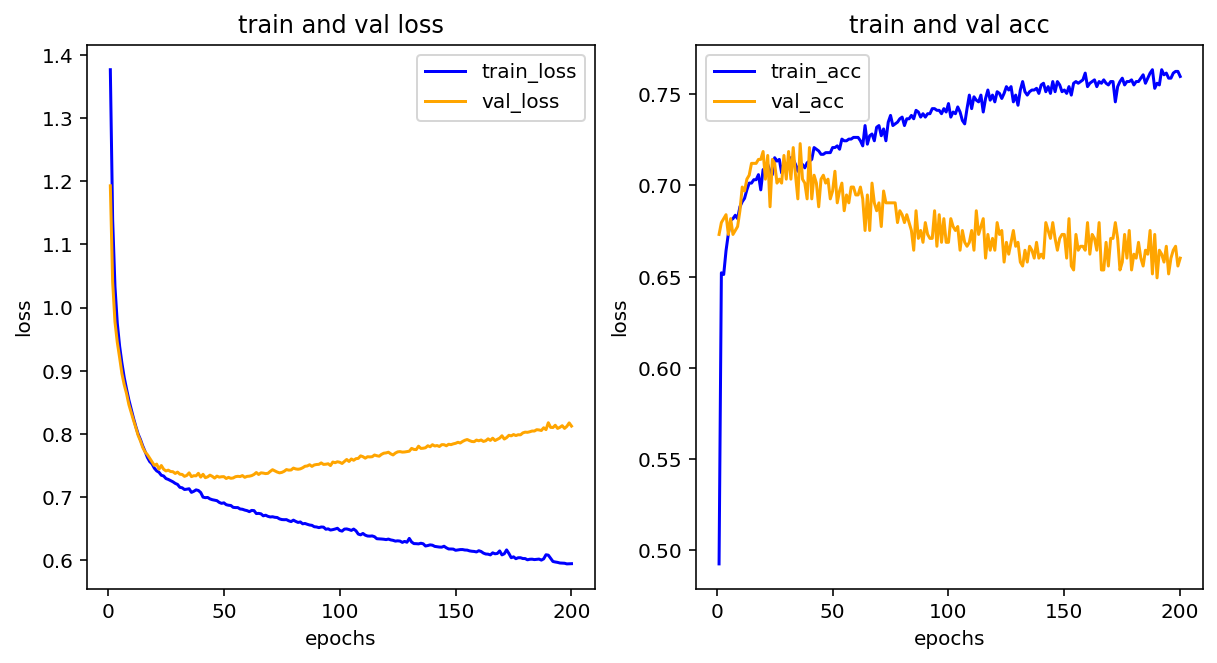

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

# train 정확도와 val 정확도가 만나는 시점이 가장 좋은 spot이다.
# 만약 이 격차가 벌어진다면 overfitting 된다고 볼 수 있다.

## 모델 평가하기

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 10ms/step - loss: 0.9497 - accuracy: 0.5909
accuracy: 59.09%


## 모델 예측하기

예측값 그려서 확인해보기

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')


(44, 5)
각 클래스에 속할 확률 : 
[0.7383573 0.2351982 0.0221426 0.0042348 0.0000671]


## 모델 평가 방법 - 혼동행렬

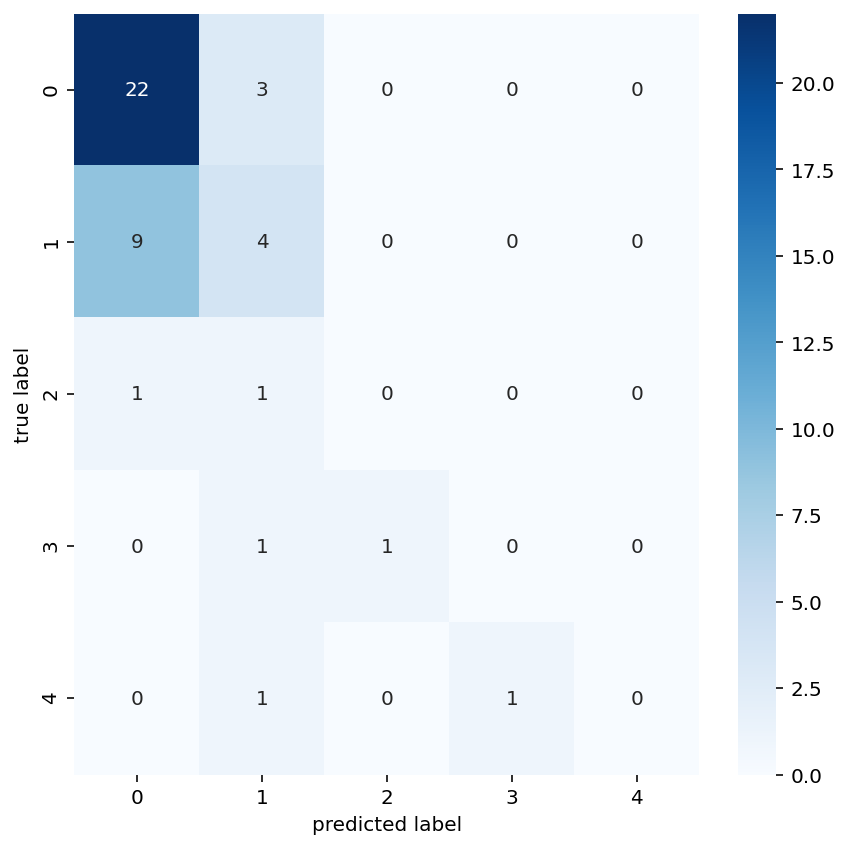

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# 색이 진할수록 정확도가 높아진다.
# 예측에 많이 틀리는 것을 찾을 수 있다.


## 모델 평가 방법 2 - 분류 보고서

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# recall 값이 가장 떨어지는 8값의 글씨를 보완해서 학습을 시키자



               precision    recall  f1-score   support

           0       0.69      0.88      0.77        25
           1       0.40      0.31      0.35        13
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.59        44
   macro avg       0.22      0.24      0.22        44
weighted avg       0.51      0.59      0.54        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

